# Example notebook for Felix

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import vstack, QTable
import astropy.units as u
import pickle 
from importlib import reload
import re

# read in the data

In [2]:
# fix up custom units
gvis = u.def_unit('Gvis',namespace=globals())
u.add_enabled_units([gvis])

In [3]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_initial_goal_20240828.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_initial_goal_20240828.ecsv')

In [4]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [5]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [6]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

## Make a plot

In [7]:
np.min(wsu_all['wsu_productsize_early_stepped2'].to('TB'))

<Quantity 8.96e-06 Tbyte>

In [8]:
np.max(wsu_all['wsu_productsize_early_stepped2'].to('TB'))

<Quantity 579.64588522 Tbyte>

In [9]:
np.sum(wsu_all['wsu_productsize_early_stepped2'].to('TB')).to('PB')

<Quantity 23.45309802 Pbyte>

Text(0.5, 1.0, '12m+7m data')

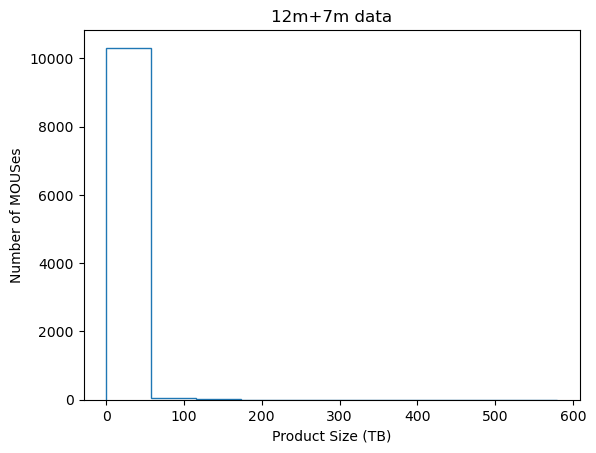

In [10]:
plt.hist(wsu_all['wsu_productsize_early_stepped2'].to('TB').value,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Number of MOUSes')
plt.title('12m+7m data')

Text(0.5, 1.0, '12m+7m data')

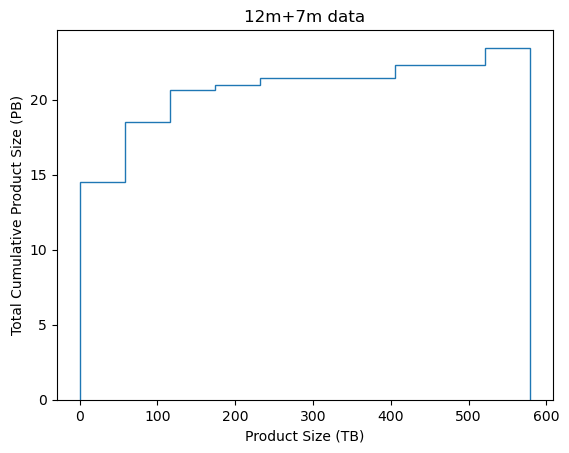

In [11]:
## by setting the weights to the value in PB, we can get the cumulative sum over all the data. 
## Note that the max value agrees with the 11.72PB calculated earlier.
plt.hist(wsu_all['wsu_productsize_early_stepped2'].to('TB').value,
        weights=wsu_all['wsu_productsize_early_stepped2'].to('PB').value, 
        cumulative=True,density=False,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Total Cumulative Product Size (PB)')
plt.title('12m+7m data')

Text(0.5, 1.0, '7m data only')

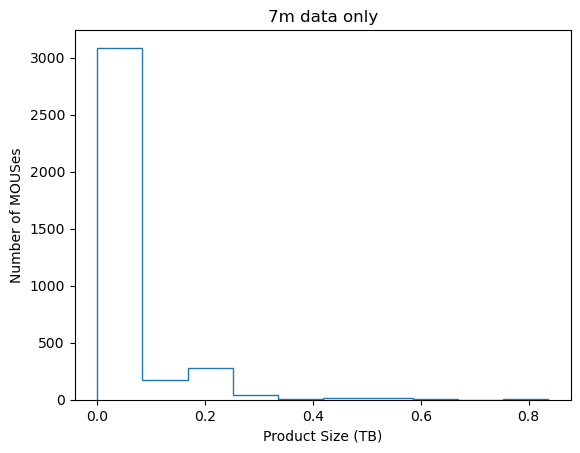

In [12]:
## plotting only 7m data
idx = wsu_all['array'] == '7m'
plt.hist(wsu_all[idx]['wsu_productsize_early_stepped2'].to('TB').value,histtype='step',align='mid')
plt.xlabel('Product Size (TB)')
plt.ylabel('Number of MOUSes')
plt.title('7m data only')

(array([1.012e+04, 1.460e+02, 4.600e+01, 2.200e+01, 1.800e+01, 1.000e+01,
        1.200e+01, 4.000e+00, 2.000e+00, 4.000e+00]),
 array([1.11360000e-03, 7.55609474e+02, 1.51121783e+03, 2.26682620e+03,
        3.02243456e+03, 3.77804292e+03, 4.53365128e+03, 5.28925964e+03,
        6.04486800e+03, 6.80047636e+03, 7.55608472e+03]),
 <BarContainer object of 10 artists>)

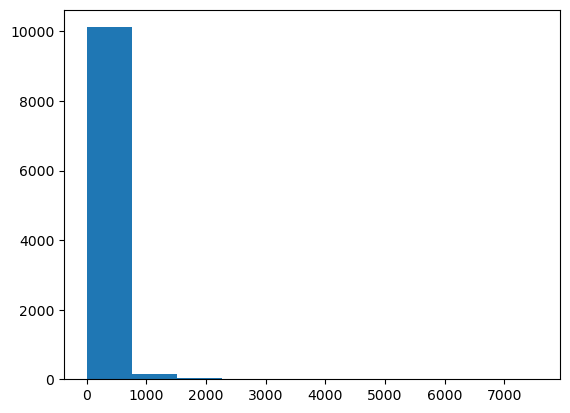

In [16]:
plt.hist(wsu_all['wsu_cubesize_initial_stepped2'].value )

In [18]:
idx = wsu_all['wsu_cubesize_initial_stepped2'] > 100.0 * u.GB
len(wsu_all[idx]['wsu_cubesize_initial_stepped2'])


928

In [19]:
len(wsu_all)

10384